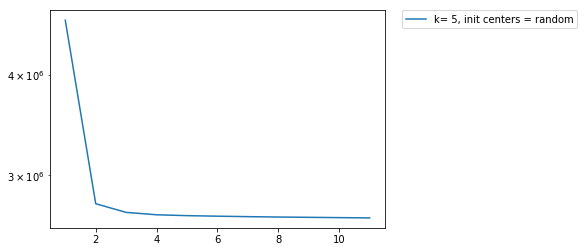

<Figure size 432x288 with 0 Axes>

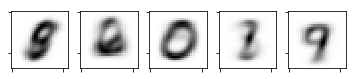

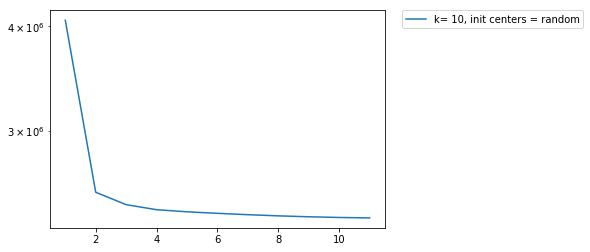

<Figure size 432x288 with 0 Axes>

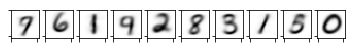

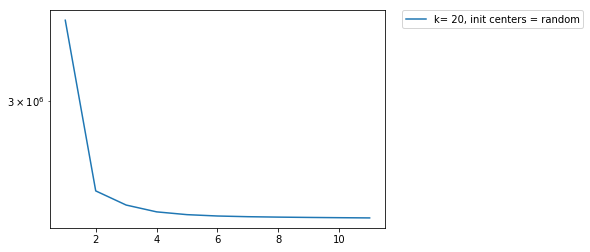

<Figure size 432x288 with 0 Axes>

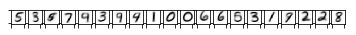

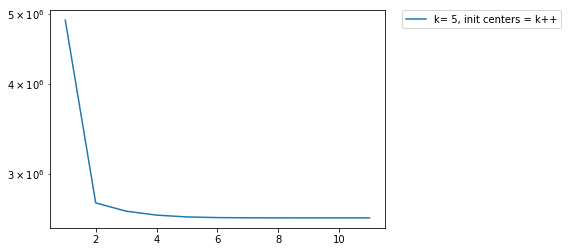

<Figure size 432x288 with 0 Axes>

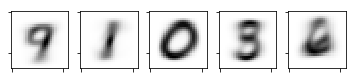

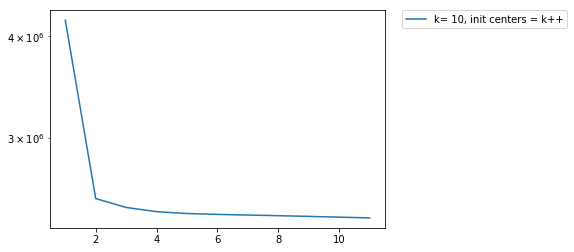

<Figure size 432x288 with 0 Axes>

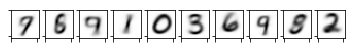

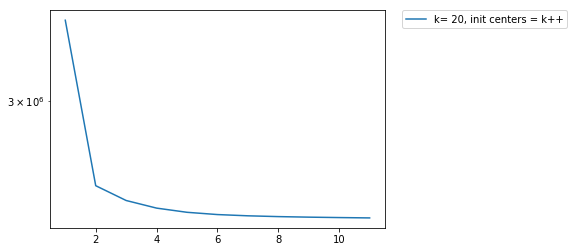

<Figure size 432x288 with 0 Axes>

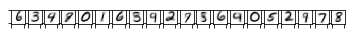

In [20]:
import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt
import itertools
from loader import MNIST

# function that imports the data, and returns the train-test split with the corresponding labels
def import_data():
    mndata = MNIST('../hw1/data/')
    X_train, labels_train = map(np.array, mndata.load_training())
    X_test, labels_test = map(np.array, mndata.load_testing())
    X_train = X_train/255.0
    X_test = X_test/255.0
    return (X_train, labels_train), (X_test, labels_test)

# computes the average of a set of points
def center(x):
    return np.sum(x,axis=0)/x.shape[0]

# generates the probability distribution required for the sampling used by kplusplus 
def square_distance(X,centers):
    dist = np.zeros((X.shape[0],1))
    for i in range(X.shape[0]):
        diff = np.transpose(centers) - np.reshape(X[i],(X.shape[1],1))
        dist[i][0] = np.min(np.sum(diff*diff,axis=0))
    return np.reshape(dist/np.sum(dist),(X.shape[0],))

# generates k centers using the kplusplus initialization scheme
def kplusplus(X,k):
    centers = np.zeros((k,X.shape[1]))
    p = np.ones((X.shape[0],))/X.shape[0]
    for i in range(k):
        centers[i] = X[np.random.choice(X.shape[0],1,p=p)]
        p = square_distance(X,centers[range(i+1)])
    return centers

# generates k random centers from the given set of points
def random_centers(X,k):
    perm = np.random.permutation(X.shape[0])
    kcent = perm[range(k)]
    centers = X[kcent]
    return centers

# computes the objective function given the centers and the assignment of the points to these centers
def square_distance_center(X,centers,assign):
    k = centers.shape[0]
    distsqr = 0
    for i in range(k):
        dist = np.transpose(X[assign==i,:]) - np.reshape(centers[i,:],(centers.shape[1],1))
        distsqr = distsqr + np.sum(dist*dist)
    return distsqr
    
# X is a n by d array
def kmeans(X,centers,iterations):
    k = centers.shape[0]
    assign = np.zeros(X.shape[0])
    objfun = []
    for j in range(iterations):
        #generate new assignments:
        for i in range(X.shape[0]):
            dist = np.transpose(centers) - np.reshape(X[i],(len(X[i]),1))
            assign[i] = np.argmin(np.sum(dist*dist,axis=0))
        
        objfun.append(square_distance_center(X,centers,assign))
        
        #find new centers:
        for i in range(k):
            label_index = (assign == i)
            centers[i,:] = center(X[label_index])
    
    # just handling an overflow case
    for i in range(X.shape[0]):
        dist = np.transpose(centers) - np.reshape(X[i],(len(X[i]),1))
        assign[i] = np.argmin(np.sum(dist*dist,axis=0))
    
    objfun.append(square_distance_center(X,centers,assign))
            
    return centers,assign,objfun

#def display(X,centers,assign,plt):
#    plt.figure(plt)
#    plt.scatter(centers[:,0],centers[:,1],label="Centers")
#    for i in range(centers.shape[0]):
#        label_index = (assign == 1)
#        plt.scatter(X[label_index,:][:,0],X[label_index,:][:,1], label = "Cluster "+i)
    
#    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#    plt.show();

# function that plots the iteration vs objective function graph
def iter_obj_graph(x,cnt,pltnum,k,init_centers):
    plt.figure(pltnum)
    plt.plot(range(1,cnt+1),x,label = "k= "+str(k)+", init centers = "+init_centers)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.yscale('log')
    plt.xlabel('iterations')
    plt.ylabel('objective function')
    plt.show();
    return

# function that plots the centers
def visualize_centers(centers,pltnum,k,init_centers):
    plt.figure(pltnum)
    fig,axises = plt.subplots(1,k,sharey=True)
    i=0
    for axis in axises:
        axis.imshow(np.reshape(centers[i],(28,28)),cmap = 'Greys', interpolation = 'nearest')
        i = i + 1
        axis.set_yticklabels([])
        axis.set_xticklabels([])
    plt.show();
    return
    
(X_train,labels_train),(X_test,labels_test) = import_data()
i = 1
iterations = 10
for k in [5,10,20]:
    centers = random_centers(X_train,k)
    centers,assign,objfun = kmeans(X_train,centers,iterations)
    iter_obj_graph(objfun,iterations+1,i,k,"random")
    i = i + 1
    visualize_centers(centers,i,k,"random")
    i=i+1

for k in [5,10,20]:
    centers = kplusplus(X_train,k)
    centers,assign,objfun = kmeans(X_train,centers,iterations)
    iter_obj_graph(objfun,iterations+1,i,k,"k++")
    i = i + 1
    visualize_centers(centers,i,k,"k++")
    i = i+1

In [5]:
x = np.array([1,2,3,3,2,4,0,1])
index = x == 1
print(index)
print(x[index])

[ True False False False False False False  True]
[1 1]


In [10]:
A = 2*np.ones((2,2))
B = np.ones((2,1))
print(A-B)

[[1. 1.]
 [1. 1.]]


In [8]:
A = np.ones((3,2))
print(np.sum(A,axis=0))

[3. 3.]
